<h2><b><font color="green">Task IV</font></b></h2>
<h1><i><b><font color="purple">Price Test</font></b></i></h1>

Prior to embarking on the analysis phase, it is wise to conduct a comprehensive review of both <b>the business domain</b> and <b>the data understanding</b> steps. This initial examination serves as a foundational precursor, enabling a more structured and informed approach to subsequent analytical endeavors:
<ul>
    <li><i><b><font color="darkblue">Request:</font></b></i> The percentage change in the number of orders submitted by customers.</li>
    <li><i><b><font color="darkblue">Ride:</font></b></i> The percentage change in the number of completed rides (successful deliveries).</li>
    <li><i><b><font color="darkblue">Price Conversion:</font></b></i> The percentage change in the ratio of users who submitted orders to those who received the prices.</li>
    <li><i><b><font color="darkblue">Accepted-Order / Offered-Order%:</font></b></i> The change in the percentage of accepted orders by bikers out of the total offered orders to them.</li>
    <li><i><b><font color="darkblue">Fullfillment Rate%:</font></b></i> The change in the percentage of completed rides out of the total accepted orders.</li>
    <li><i><b><font color="darkblue">GMV (Gross Merchandise Value)</font></b></i>: The percentage change in the total sum of ride prices.</li>
    <li><i><b><font color="darkblue">Average Fare Per KM:</font></b></i> The percentage change in the average fare per kilometer.</li>
    <li><i><b><font color="darkblue">Ride Per Check:</font></b></i> The percentage change in the ratio of completed rides to users who received prices.</li>
    </ul>

Importing the necessary Python libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import product
from warnings import filterwarnings
filterwarnings('ignore')

I have downloaded the Google Sheets data as a CSV file, and now I am going to upload it here in Jupyter Notebook using the Pandas library:

In [2]:
df = pd.read_csv(r'C:\Users\ECC\Hiring Tasks\Copy of SnappBox! Pricing Data Analyst Hiring Task - Price Test.csv')
df.drop(0, inplace=True) ; df.drop('Unnamed: 0', axis=1, inplace=True)
cols = ['city', 'test_day'] ; cols.extend(list(df.loc[1].values[2:]))
df.set_axis(cols, axis='columns', inplace=True) ; df.drop(1, inplace=True)
df = df.reset_index().drop('index', axis=1) ; df.city.fillna(method='ffill', inplace=True)

df

,city,test_day,Request,Ride,Price Conversion,Accepted-Order / Offered-Order%,Fullfillment Rate%,GMV,Average Fare Per KM,Ride Per Check
0,City 1,Test Day 1,-6%,-1%,-1%,2%,3%,3%,6%,1%
1,City 1,Test Day 2,-2%,2%,-1%,1%,3%,4%,3%,1%
2,City 2,Test Day 1,-5%,-4%,-1%,0%,0%,-3%,1%,-1%
3,City 2,Test Day 2,-2%,-5%,-4%,-1%,-2%,9%,12%,-1%
4,City 3,Test Day 1,-4%,-5%,0%,-2%,-1%,-7%,1%,-1%
5,City 3,Test Day 2,-3%,-3%,-2%,0%,0%,-2%,3%,0%
6,City 4,Test Day 1,-5%,3%,1%,5%,5%,1%,1%,1%
7,City 4,Test Day 2,-4%,-1%,-1%,2%,2%,-3%,1%,0%
8,City 5,Test Day 1,-8%,-4%,-1%,4%,2%,14%,20%,0%
9,City 5,Test Day 2,-9%,2%,-2%,7%,7%,5%,7%,1%


To gain a more comprehensive perspective for our subsequent analysis, we will construct a dataframe comprising the average percentage change of each feature across the two days of testing for every city. This step will facilitate a clearer understanding of the data for further examination:

In [15]:
mean_df = df.drop('test_day', axis=1)
mean_df[mean_df.columns[1:]] = mean_df[mean_df.columns[1:]].apply(lambda r:r.str.rstrip('%').astype(float))
mean_df = mean_df.groupby(['city'], as_index=False)[cdf.columns[1:]].mean()
mean_df

,city,Request,Ride,Price Conversion,Accepted-Order / Offered-Order%,Fullfillment Rate%,GMV,Average Fare Per KM,Ride Per Check
0,City 1,-4.0,0.5,-1.0,1.5,3.0,3.5,4.5,1.0
1,City 2,-3.5,-4.5,-2.5,-0.5,-1.0,3.0,6.5,-1.0
2,City 3,-3.5,-4.0,-1.0,-1.0,-0.5,-4.5,2.0,-0.5
3,City 4,-4.5,1.0,0.0,3.5,3.5,-1.0,1.0,0.5
4,City 5,-8.5,-1.0,-1.5,5.5,4.5,9.5,13.5,0.5
5,City 6,-4.0,-5.5,-1.0,-2.0,-1.0,-4.5,-4.5,-0.5


To begin, we'll conduct an <b>initial analysis</b> by taking an inceptive glimpse at the data. This preliminary examination aims to shed light on how the changes in pricing have influenced various aspects of the business:

<ul>
    <li><i><b><font color="purple">Request:</font></b></i> There is a decrease in the number of orders submitted (indicated by a negative percentage change) across all of the cities during both days of testing. <u>This suggests that the price increase may have discouraged customers from placing orders.</u> However, the magnitude of the decrease is relatively small. Also, it's worth noting that this decrease varies across cities and exhibits differences between the first and second days of the test.</li> <br></br>
        <li><i><b><font color="purple">Ride:</font></b></i> The alterations in the number of completed rides reveal a mixed pattern. In specific cities – City 2, City 3, and City 6 – we observe a decrease in completed rides on both test days. On the first test day, City 1 and City 5 also exhibit a decrease, while City 4 experiences a reduction on the second test day. Conversely, some cities – City 4 on the first test day, and City 1 and City 5 on the second test day – manifest an increase in completed rides.
This variability in ride completion does not follow a consistent trend across all cities or both testing days. Notably, <u>the concurrent occurrence of a positive change in certain cities alongside a negative percentage change in the number of Requests implies that the price adjustment may have encouraged bikers to accept a higher volume of ride requests.</u></li> <br></br>
    <li><i><b><font color="purple">Price Conversion:</font></b></i> A majority of cities display a modest reduction in price conversion rates. This observation indicates a potential consequence of the price increase: certain users might have abandoned the conversion process upon encountering the updated prices. <u>This behavior could imply that prospective customers were less inclined to continue with their orders after being exposed to the elevated pricing.</u></li> <br></br>
    <li><i><b><font color="purple">Accepted-Order / Offered-Order%:</font></b></i> The trend of this metric varies across different cities, wherein the majority exhibit an increase in the acceptance rate of orders. It's worth noting that the decrease seen in a couple of cities—specifically, City 2 on the second test day and City 3 on the first test day—shows a relatively modest impact in terms of magnitude. <u>This could imply that the price adjustment may have encouraged bikers to accept a higher volume of ride requests.</u> On the other hand, City 6 records a reduction in the acceptance rate for orders on both testing days. This pattern could imply <u>that the price increase might have adversely affected driver acceptance rates in this particular city (City 6) </u>. Nevertheless, it's important to emphasize that these observed changes are also of a relatively minor nature.</u></li> <br></br>
    <li><i><b><font color="purple">Fullfillment Rate%:</font></b></i> <u>Fulfillment rates across different cities exhibit a strong correlation with the "Accepted-Order / Offered-Order" ratio.</u> This implies that when the acceptance ratio sees an increase, a corresponding rise is observed in the fulfillment rate. Conversely, a decrease in the acceptance ratio aligns with a decline in the fulfillment rate, and instances where the acceptance ratio remains unchanged correspond to a steady fulfillment rate as well.</li> <br></br>
    <li><i><b><font color="purple">GMV (Gross Merchandise Value):</font></b></i> GMV shows both positive and negative changes across cities, leading to an inconsistent impact on overall revenue. At this stage, no specific pattern is discernible.</li> <br></br>
    <li><i><b><font color="purple">Average Fare Per KM:</font></b></i> Alterations in the average fare per kilometer reveal an upward trend across all cities, except for City 6, where there's a decline in the percentage change for this metric.</li> <br></br>
    <li><i><b><font color="purple">Ride Per Check:</font></b></i> This metric demonstrates a considerable degree of stability, exhibiting minimal changes across the majority of cities. This observation suggests that the ratio of completed rides to users who received pricing information has not undergone significant changes. This phenomenon could potentially indicate a compensatory effect, where the decline in the Request ratio and Price Conversion ratio has been counterbalanced by an increase in the acceptance ratio</li>
    </ul>

In order to conduct an analysis of the test results aimed at informing the decision to potentially implement price increases within the specified cities, it is insightful to proceed with a comprehensive <b><font color="darkgreen">visualization of the observed metric alterations spanning from the commencement of the test <u>(day one)</u> to its subsequent iteration <u>(day two)</u>.</font></b> This visualization endeavor will serve as a crucial step in understanding the underlying patterns that may elucidate the potential impact of the proposed price adjustments:

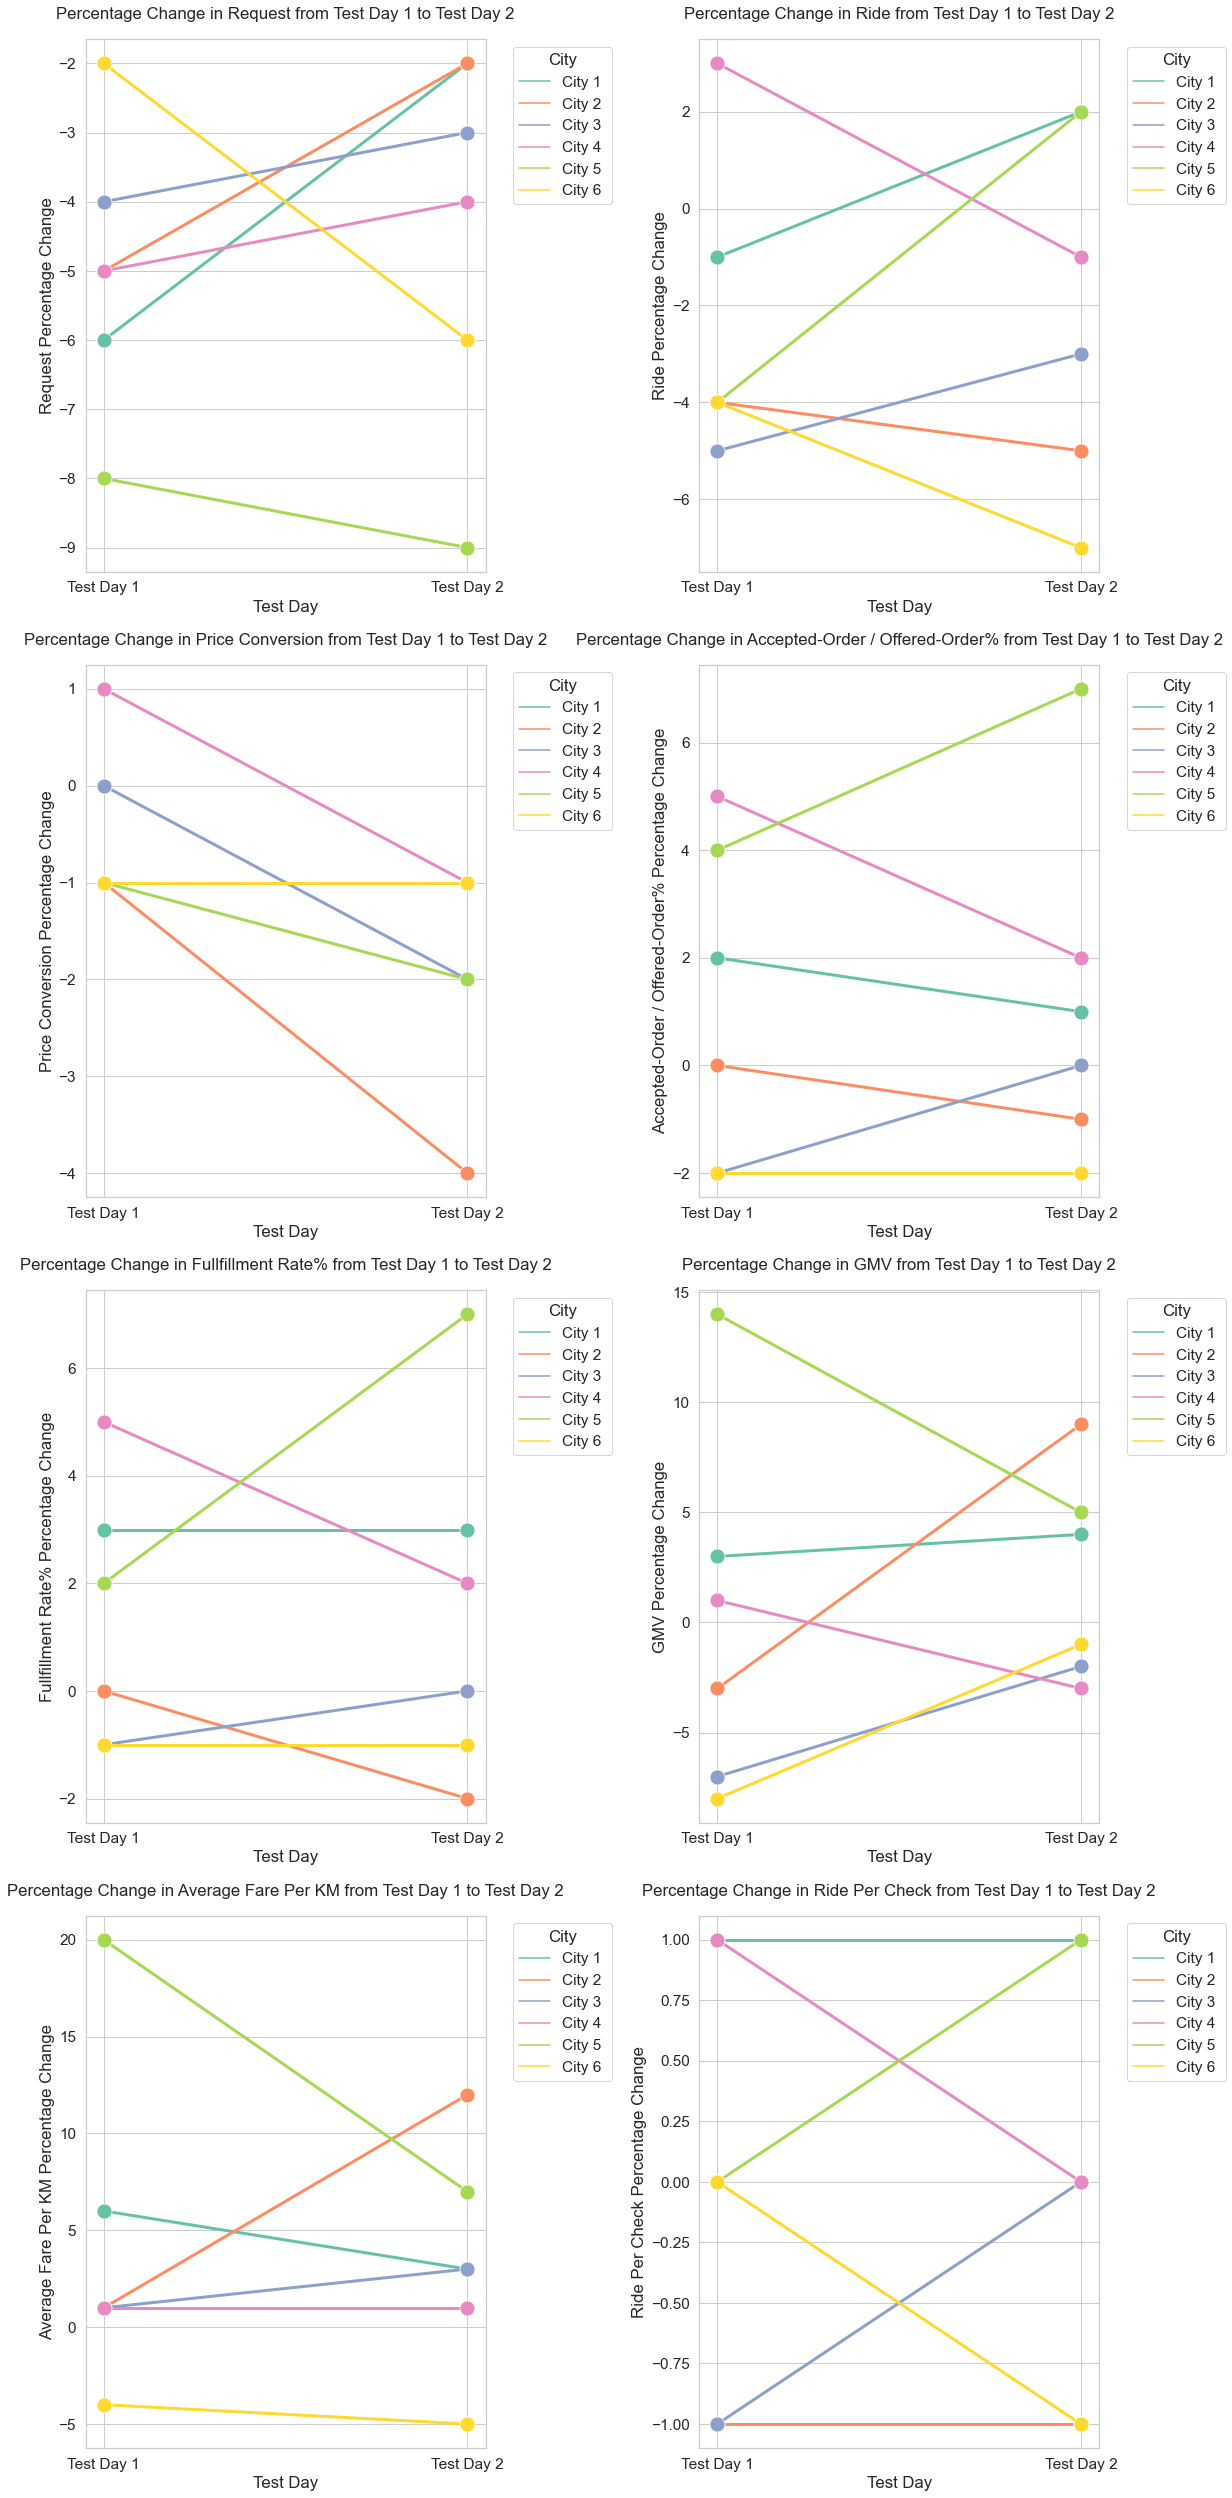

In [4]:
fig, ax = plt.subplots( 4, 2, figsize=(17,35) )
sns.set(font_scale = 1.4, style="whitegrid")
ax_idx = list(product(range(4), [0, 1]))

for idx, col in enumerate(df.columns[2:]):
    plot_ax = ax[ax_idx[idx][0]][ax_idx[idx][1]]
    sns.lineplot(
        x=df['test_day'], y=df[col].str.rstrip('%').astype(float),
        ax=plot_ax, hue=df.city, palette='Set2',
        marker='o', markersize=15, linewidth=3
    )
    plot_ax.set_title(
        "Percentage Change in {} from Test Day 1 to Test Day 2".format(col),
        pad=20
    )
    plot_ax.set_xlabel("Test Day")
    plot_ax.set_ylabel("{} Percentage Change".format(col))
    
    plot_ax.legend(
        title="City",
        bbox_to_anchor=(1.05, 1),
        loc='upper left'
    )

plt.tight_layout()
plt.show()

Now, we'll go ahead and generate a data frame that captures the metric changes observed between day one and day two of the test, as illustrated in the visualization we've just examined. This data frame will serve as a practical tool for a more in-depth exploration and assessment of the observed alterations:

In [5]:
diff_df = pd.DataFrame(columns=['city', 'Feature', 'Difference'])

cities = df['city'].unique()
for city in cities:
    city_data = df[df['city'] == city]
    for feature in df.columns[2:]:
        day1_value = city_data[city_data['test_day'] == 'Test Day 1'][feature].values[0]
        day2_value = city_data[city_data['test_day'] == 'Test Day 2'][feature].values[0]
        
        day1_value = float(day1_value.strip('%'))
        day2_value = float(day2_value.strip('%'))
        difference = day2_value - day1_value
        
        diff_df = diff_df.append({'city': city, 'Feature': feature, 'Difference': difference}, ignore_index=True)

# Pivot the new DataFrame to get the desired format
diff_df = diff_df.pivot(index='city', columns='Feature', values='Difference')
diff_df = diff_df[df.columns[2:]]

diff_df

Feature,Request,Ride,Price Conversion,Accepted-Order / Offered-Order%,Fullfillment Rate%,GMV,Average Fare Per KM,Ride Per Check
city,,,,,,,,
City 1,4.0,3.0,0.0,-1.0,0.0,1.0,-3.0,0.0
City 2,3.0,-1.0,-3.0,-1.0,-2.0,12.0,11.0,0.0
City 3,1.0,2.0,-2.0,2.0,1.0,5.0,2.0,1.0
City 4,1.0,-4.0,-2.0,-3.0,-3.0,-4.0,0.0,-1.0
City 5,-1.0,6.0,-1.0,3.0,5.0,-9.0,-13.0,1.0
City 6,-4.0,-3.0,0.0,0.0,0.0,7.0,-1.0,-1.0


The analyses of <b><mark>visualizations</mark></b> and data within <b><mark>"df"</mark></b>, <b><mark>"mean_df"</mark></b>, and <b><mark>"diff_df"</mark></b> have provided substantial insights, contributing to the formulation of the subsequent conclusions.:



<ul>
    <li><b>1)</b> Despite witnessing a decline in the number of orders placed (evidenced by a negative percentage change) across all cities during the entirety of the testing period, it is worth noting that the second test day exhibited <b>an increase in the number of <i><font color="darkblue">Requests</font></i> in the first 4 cities.</b> In contrast, <b>City 5 and City 6 experienced a further decrease in request numbers on the second day.</b> <u>Although the magnitude of this decrease in City 5 is relatively modest.</u> <font color="darkblue">This pattern implies that <b>in the first four cities, customers might have shown an inclination to adapt to the price increase.</b></font><br></br>
    <font color="green"><i>Cities that hold potential for a <b>Possitive</b> response to a price increase <u>(so far)</u>:</i> <b>City 1, City 2, City 3, City 4, City 5</b></font><br></br>
    <font color="red"><i>Cities that hold potential for a <b>Negative</b> response to a price increase <u>(so far)</u>:</i> <b>City 6</b></font><br></br></li>
    <li><b>2)</b> In both <b>City 3</b> and <b>City 5</b>, we observe an increase in the number of <i><b><font color="darkblue">Rides, Accepted Order ratio, and Fulfillment Rate</font></b></i> on the second test day.In <b>City 1</b>, the count of <i><b><font color="darkblue">Rides</font></b></i> has risen, though with a slight decrease in the <i><b><font color="darkblue">Accepted Order ratio</font></b></i>. However, as the <i><b><font color="darkblue">Fulfillment Rate</font></b></i> remained unchanged on the second day, this minor decline in the acceptance ratio might be attributed to the simultaneous increase in the number of rides.(It's noteworthy to take into account that despite the observed enhancements on the second test day in City 3, a thorough examination of "df" and "mean_df" indicates a prevalent minor negative change percentage across most metrics. This suggests that the business landscape in City 3 was more favorable prior to the implementation of the price increase. Nevertheless, my focus remains on identifying cities that exhibit the potential for a positive response to a price increase.)
    
In both <b>City 2</b> and <b>City 4</b>, we observe a reduction in the number of <i><b><font color="darkblue">Rides, Accepted Order ratio, Price Conversion, and Fulfillment Rate</font></b></i> on the second test day. Notably, in <b>City 4</b>, the increase in the number of <i><b><font color="darkblue">Requests</font></b></i> was marginal at 1% on the second day. However, alongside this, we also note a decline in <i><b><font color="darkblue">GMV and Ride Per Check</font></b></i>, coupled with the aforementioned metrics. <font color="darkblue">This collective decline suggests that <b>implementing a price increase in City 4 may not be the most prudent course of action.</b></font>

In <b>City 2</b>, while a significant increase has been identified in <i><b><font color="darkblue">GMV and Average Fare Per KM</font></b></i>, it's important to acknowledge that this might be due to the introduction of the new pricing policy. <font color="darkblue">This circumstance implies that <b>increasing prices in City 2 could entail risks and might not align well with the business's long-term objectives.</b></font><br></br>
    <font color="green"><i>Cities that hold potential for a <b>Possitive</b> response to a price increase <u>(so far)</u>:</i> <b>City 1, City 3, City 5</b></font><br></br>
    <font color="red"><i>Cities that hold potential for a <b>Negative</b> response to a price increase <u>(so far)</u>:</i> <b>City 2, City 4, City 6</b></font><br></br></li>
    <li><b>3)</b> While <b>City 5</b> initially appeared to hold potential for a positive response to a price increase, the noteworthy decrease in <i><b><font color="darkblue">Average Fare Per KM and GMV</font></b></i> on the second day of testing serves as a cautionary signal for both bikers and the company in the long term. A sustained decline in <i><b><font color="darkblue">Average Fare Per KM</font></b></i> might lead to a reduction in the <i><b><font color="darkblue">Accepted-Order rate</font></b></i>, while a continuous decrease in <i><b><font color="darkblue">GMV</font></b></i> could pose a damaging impact on the company. However, it's worth noting that <b>City 5</b>'s <i><b><font color="darkblue">GMV</font></b></i> still exhibited a noteworthy positive percentage change on the second day (5%), reinforcing its potential for a positive response to a price increase.

Conversely, <b>City 6</b> displayed a different trend. <font color="darkblue">Every metric experienced a <b>negative percentage change on both days</b>, with each metric either further <b>decreasing or remaining still on the second day of testing</b>—except for "GMV," which increased on the second day but still held a negative percentage change.</font> Thus, based on this two-day analysis, <b><font color="darkblue">it can be confidently stated that City 6 encountered the most pronounced adverse impact from the price increase.</font></b><br></br>
    <font color="green"><i>Cities that hold potential for a <b>Possitive</b> response to a price increase:</i> <b>City 1, City 3, City 5</b></font><br></br>
    <font color="red"><i>Cities that hold potential for a <b>Negative</b> response to a price increase:</i> <b>City 2, City 4, City 6</b></font><br></br></li>
    </ul>

<h2><b><font color="darkviolet">conclusion :</font></b></h2>

In this analysis, a definitive determination regarding the advisability of price increases in these cities remains challenging. However, based on the company's data, it becomes apparent that <i><font color="green"><b>City 1</b>, followed by <b>City 5</b> and <b>City 3</b>, hold <b>the most promise for a favorable response to such adjustments</b>.</font></i> <i><font color="darkred">Conversely, <b>City 6</b>, <b>City 4</b>, and <b>City 2</b> show indications of <b>potentially unfavorable reactions to price increases, with City 6 facing the most pronounced adverse impact.</b></font></i>

Furthermore, to make an informed decision on whether to implement price increases in these six cities, it is crucial to consider <b>the delicate balance between short-term revenue gains and potential long-term customer retention.</b>

Moreover, if the option of conducting controlled experiments is viable, the establishment of <b>A/B tests</b> could prove valuable. By subjecting a <b>subset of customers and bikers</b> in each of these cities to the price increase <b>(test group)</b> while maintaining others without the change <b>(control group)</b>, an A/B test facilitates direct measurement of the causal effect induced by the price adjustment. This approach not only enables precise quantification of the price increase's impact on various metrics but also <b>empowers further statistical analyses such as the implementation of Z-tests.</b>